In [1]:
import sys
sys.path.insert(0,'C:\\Users\\student\\OneDrive\\Desktop\\cbs\\Third Semester\\Python for the financial economist\\python_for_the_financial_economist-master\\')


In [20]:
!pip install tensorflow numpy pandas scikit-learn matplotlib

import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
import joblib

In [4]:
file_path = r"C:\Users\joseo\OneDrive\Desktop\cbs\Fourth Semester\train_output_dt_2304.xlsx"
file_path_1 = r"C:\Users\joseo\OneDrive\Desktop\cbs\Fourth Semester\test_output_dt_2304.xlsx"

train_output = pd.read_excel(file_path)
test_output = pd.read_excel(file_path_1)

train_output.head()


,year,month,permno,agr,sgr,chinv,pchcapx,grltnoa,pchsaleinv,chcsho,...,log_ep,log_dy,log_lev,log_sp,cashpr,roic,log_vol,momentum_12m,roe,excess_return
0,2001,1,10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831451,1.514101,0.593348,0.868780,-3.101556,0.225085,NaN,NaN,NaN,-0.047737
1,2001,2,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.488878,0.104165,0.403347,0.039194
2,2001,3,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.371535,0.031436,0.403347,0.048317
3,2001,4,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.374019,-0.057692,0.403347,-0.120083
4,2001,5,10001,0.247968,0.914105,1.230867,-0.348929,-0.149504,-0.417142,-0.245089,...,0.898633,1.441221,0.486671,0.918342,-1.677555,0.256299,-1.331596,-0.087932,0.403347,0.009734


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
train_output.tail()
train_output.describe().loc[["mean", "min", "max"]]

,year,month,permno,agr,sgr,chinv,pchcapx,grltnoa,pchsaleinv,chcsho,mve,log_bm,log_ep,log_dy,log_lev,log_sp,cashpr,roic,log_vol,momentum_12m,roe,excess_return
mean,2005.600579,6.383174,72477.708308,-6.971210e-19,2.367843e-17,-7.063334e-19,-3.621257e-18,7.988363e-18,1.117080e-17,1.752645e-17,-5.149649e-16,8.257324e-18,2.792436e-16,-9.222973e-17,-8.370972e-18,-5.838426e-18,6.392042e-18,4.053633e-18,-4.087842e-16,6.001150e-18,-2.457442e-17,0.007015
min,2001.000000,1.000000,10001.000000,-2.100251e+00,-1.874527e+00,-5.723537e+00,-6.544472e+00,-3.907840e+00,-1.118155e+00,-3.663731e+00,-2.670606e+00,-4.856497e+00,-1.278604e+00,-7.796565e-01,-2.547114e+00,-6.351607e+00,-9.112829e+00,-4.969379e+01,-2.836409e+00,-1.635123e+00,-8.943866e+00,-0.803269
max,2012.000000,13.000000,93435.000000,2.004507e+01,2.220918e+02,7.711658e+00,2.555585e+01,6.595904e+00,1.254134e+01,8.031193e+00,3.187367e+00,1.226257e+00,1.243065e+00,1.940369e+00,2.930897e+00,2.054511e+00,1.214780e+01,1.048700e+00,4.268911e+00,1.163693e+01,6.302074e+00,1.397341


In [7]:
test_output.tail()
test_output.describe().loc[["mean", "min", "max"]]

,year,month,permno,agr,sgr,chinv,pchcapx,grltnoa,pchsaleinv,chcsho,mve,log_bm,log_ep,log_dy,log_lev,log_sp,cashpr,roic,log_vol,momentum_12m,roe,excess_return
mean,2015.625181,6.309168,56524.552637,0.006910,-0.011074,-0.056982,0.044842,0.022748,0.104872,-0.024124,0.288589,-0.191230,-0.192608,-0.024418,0.022083,-0.351432,0.005855,-0.369230,-0.036259,-0.150828,-0.143281,-0.012846
min,2013.000000,1.000000,10001.000000,-2.087372,-2.254422,-5.744684,-0.685249,-4.183837,-1.117149,-4.071561,-2.407973,-4.856497,-1.278604,-0.779657,-2.421188,-6.351607,-25.562462,-19.036660,-2.801092,-1.662260,-20.599738,-0.975885
max,2021.000000,13.000000,93433.000000,12.413125,16.607876,5.086522,13.530257,5.477299,36.722823,18.621227,2.894428,1.110359,1.207538,2.118526,2.266859,2.027885,6.478956,2.442389,3.542536,15.804921,30.759728,1.971323


In [10]:
#creating the target variable
train_output['excess_return_binary'] = (train_output['excess_return'] > 0).astype(int)
test_output['excess_return_binary'] = (test_output['excess_return'] > 0).astype(int)

# Now, the datasets contain the binary variable 'excess_return_binary' where:
# - 1 if 'excess_return' > 0
# - 0 otherwise
print(train_output[['excess_return', 'excess_return_binary']].head())
print(test_output[['excess_return', 'excess_return_binary']].head())


   excess_return  excess_return_binary
0      -0.047737                     0
1       0.039194                     1
2       0.048317                     1
3      -0.120083                     0
4       0.009734                     1
   excess_return  excess_return_binary
0       0.176802                     1
1      -0.132473                     0
2       0.014987                     1
3      -0.053226                     0
4      -0.003582                     0


In [11]:
X_train = train_output.drop(columns=['excess_return', 'excess_return_binary', 'year', 'permno', 'month'])
y_train = train_output['excess_return_binary']

X_test = test_output.drop(columns=['excess_return', 'excess_return_binary', 'year', 'permno', 'month'])
y_test = test_output['excess_return_binary']

## Testing Feature Importance

In [15]:
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X_train)

retained_features = X_train.columns[selector.get_support()]
dropped_features = X_train.columns[~selector.get_support()]

print("Retained Features:", list(retained_features))
print("Dropped (Low Variance) Features:", list(dropped_features))


Retained Features: ['agr', 'sgr', 'chinv', 'pchcapx', 'grltnoa', 'pchsaleinv', 'chcsho', 'mve', 'log_bm', 'log_ep', 'log_dy', 'log_lev', 'log_sp', 'cashpr', 'roic', 'log_vol', 'momentum_12m', 'roe']
Dropped (Low Variance) Features: []


Text(0.5, 1.0, 'Excess Return Distribution')

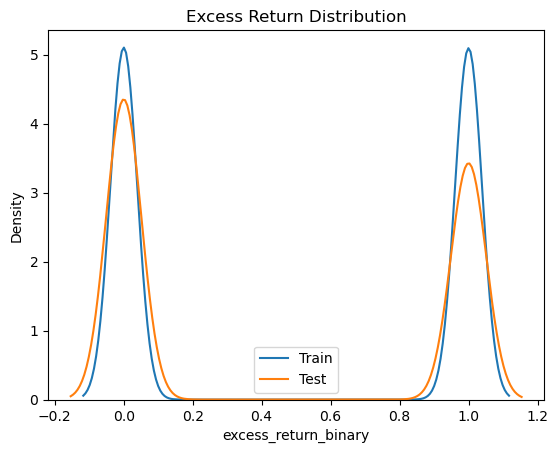

In [16]:
sns.kdeplot(y_train, label='Train'); sns.kdeplot(y_test, label='Test'); plt.legend(); plt.title("Excess Return Distribution")

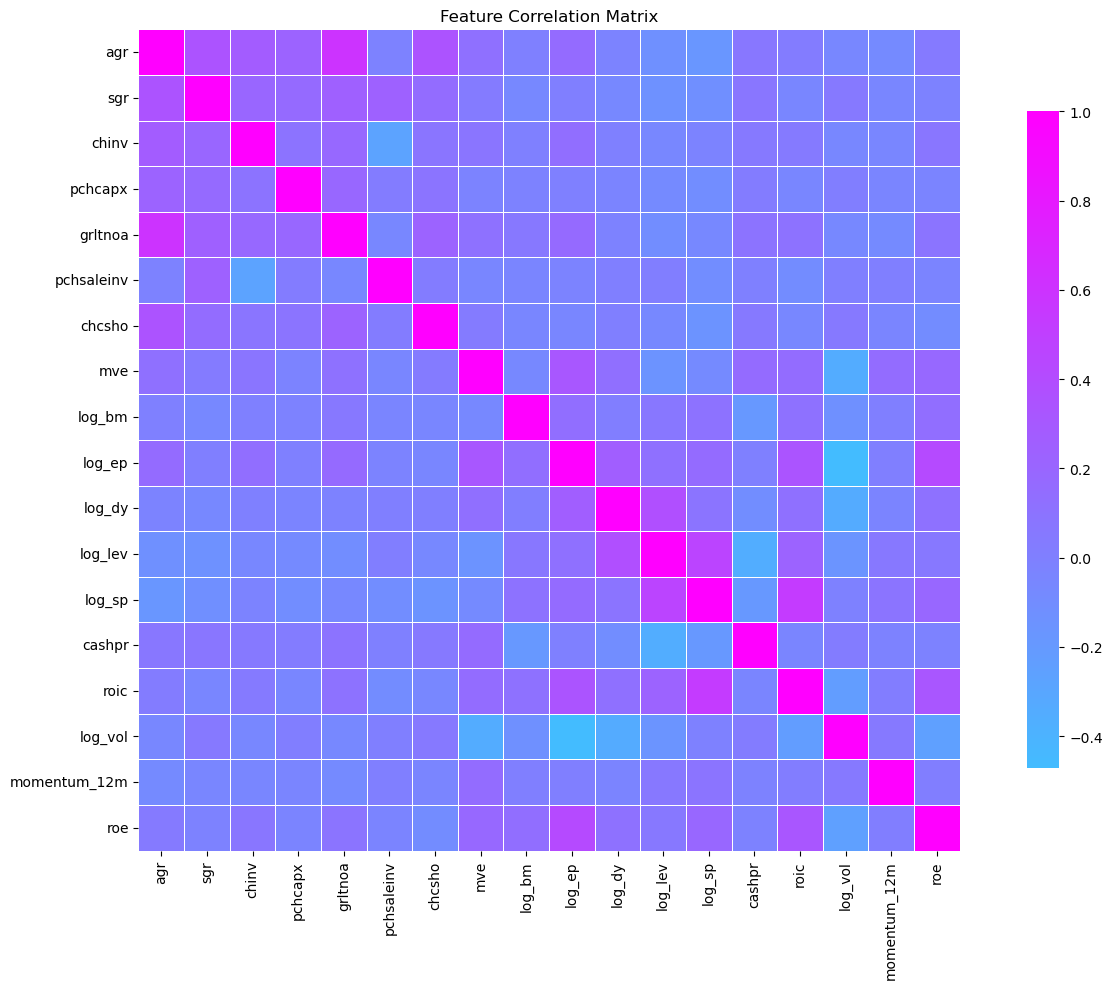

In [14]:
corr_matrix = X_train.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='cool', center=0, annot=False, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [15]:
threshold = 0.85
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = [(col, row) for col in upper.columns for row in upper.index if abs(upper.loc[row, col]) > threshold]

print("Highly correlated pairs (|r| > 0.85):")
for pair in high_corr:
    print(pair[0], "<-->", pair[1], " | Corr:", corr_matrix.loc[pair[0], pair[1]].round(2))


Highly correlated pairs (|r| > 0.85):


# Random Forest

Classification Report for Random Forest Classifier on Test Data:
              precision    recall  f1-score   support

           0       0.57      0.51      0.54     47572
           1       0.46      0.52      0.48     37453

    accuracy                           0.51     85025
   macro avg       0.51      0.51      0.51     85025
weighted avg       0.52      0.51      0.52     85025



C:\Users\joseo\AppData\Local\Temp\ipykernel_22840\1032225007.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')


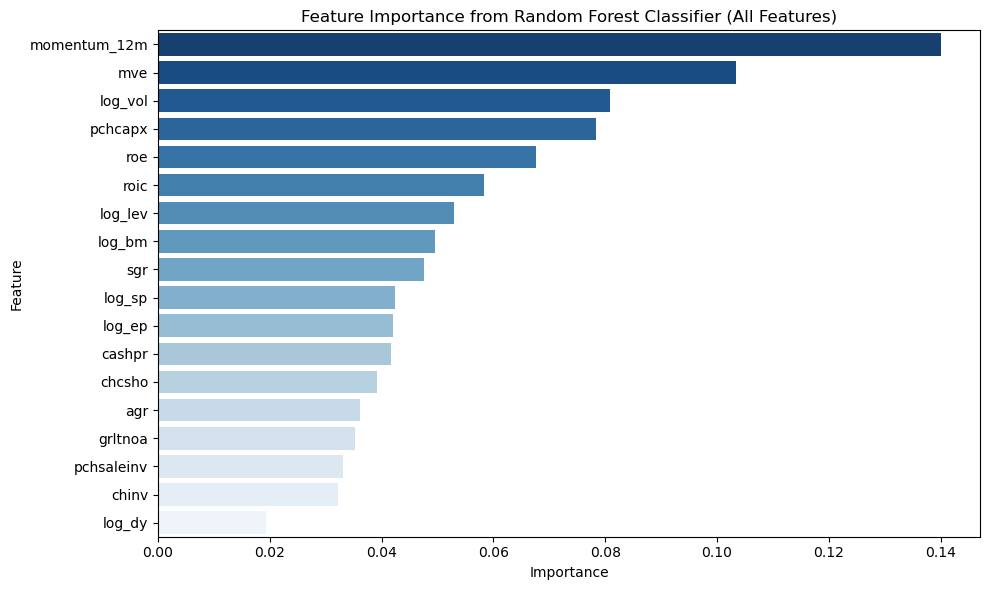

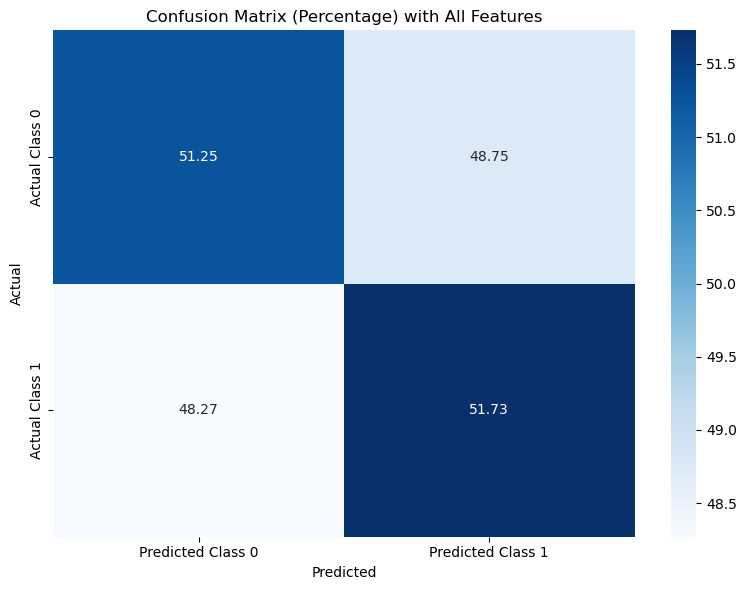

Best Threshold: 0.47
Best Balanced Accuracy: 51.80%


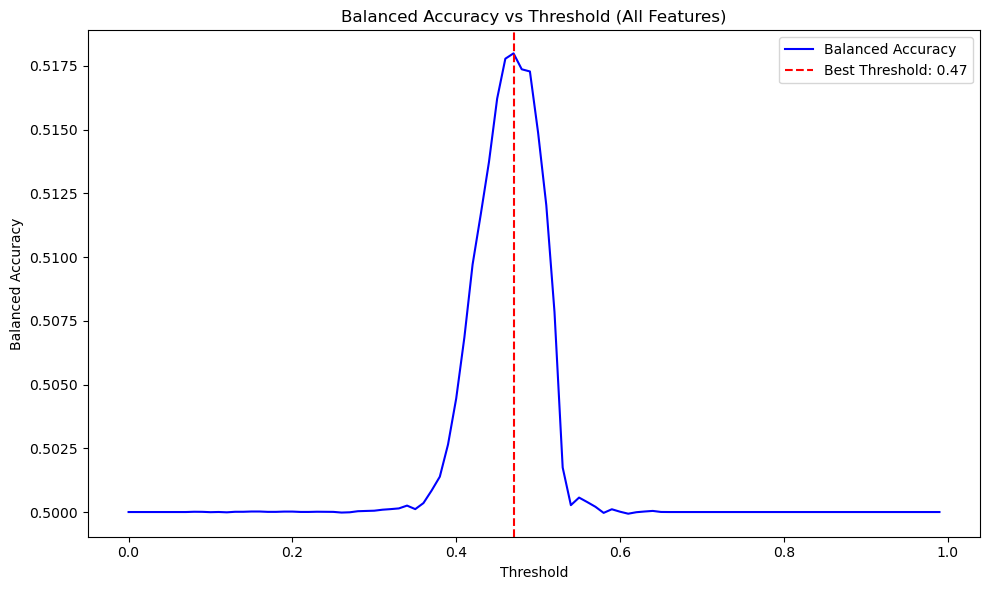

In [17]:
RFmodel = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=123
)

# Fiting the model
RFmodel.fit(X_train, y_train)

# Predicting on the test set
y_pred = RFmodel.predict(X_test)

print("Classification Report for Random Forest Classifier on Test Data:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = RFmodel.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance from Random Forest Classifier (All Features)")
plt.tight_layout()
plt.show()

# Confusion matrix (in percentage format)
cm = confusion_matrix(y_test, y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage) with All Features')
plt.tight_layout()
plt.show()

# Balanced Accuracy vs. Threshold chart
y_pred_prob = RFmodel.predict_proba(X_test)[:, 1]

best_threshold = 0
best_class_accuracy = 0
class_accuracies_per_threshold = []

thresholds = np.arange(0.0, 1.0, 0.01)

for threshold in thresholds:
    y_pred_custom = (y_pred_prob > threshold).astype(int)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_custom)
    
    accuracy_class_0 = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if cm[0, 0] + cm[0, 1] > 0 else 0
    accuracy_class_1 = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if cm[1, 0] + cm[1, 1] > 0 else 0
    
    balanced_accuracy = (accuracy_class_0 + accuracy_class_1) / 2
    
    class_accuracies_per_threshold.append((threshold, balanced_accuracy))
    
    if balanced_accuracy > best_class_accuracy:
        best_class_accuracy = balanced_accuracy
        best_threshold = threshold

print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Balanced Accuracy: {best_class_accuracy * 100:.2f}%")

thresholds, balanced_accuracies = zip(*class_accuracies_per_threshold)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, balanced_accuracies, label="Balanced Accuracy", color='b')
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f"Best Threshold: {best_threshold:.2f}")
plt.xlabel('Threshold')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy vs Threshold (All Features)')
plt.legend()
plt.tight_layout()
plt.show()


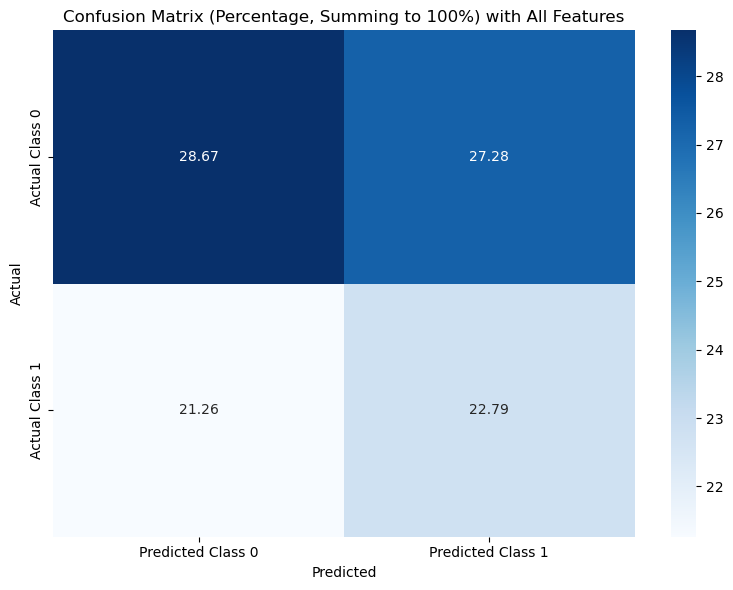

In [18]:
#Normalizing the confusion matrix to sum to 100
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentage that sums to 100 over all cells
cm_percentage = cm.astype('float') / cm.sum() * 100

# Plot confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=['Predicted Class 0', 'Predicted Class 1'],
    yticklabels=['Actual Class 0', 'Actual Class 1']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage, Summing to 100%) with All Features')
plt.tight_layout()
plt.show()


In [21]:
rf_results = {
    'model_name': 'Random Forest Classifier (All Features)',
    'model_object': RFmodel,
    'y_test': y_test.reset_index(drop=True),
    'y_pred': pd.Series(y_pred, name='RF_Pred'),
    'y_pred_prob': pd.Series(y_pred_prob, name='RF_Prob'),
    'best_threshold': best_threshold,
    'best_balanced_accuracy': best_class_accuracy,
    'feature_importance': feature_importance_df
}

joblib.dump(rf_results, 'RandomForest_Classifier_AllFeatures_Results.pkl')

print("✅ Random Forest model and results saved to 'RandomForest_Classifier_AllFeatures_Results.pkl'")


✅ Random Forest model and results saved to 'RandomForest_Classifier_AllFeatures_Results.pkl'


# Unbalanced threshold

Best Threshold: 0.64
Best Accuracy: 55.95%


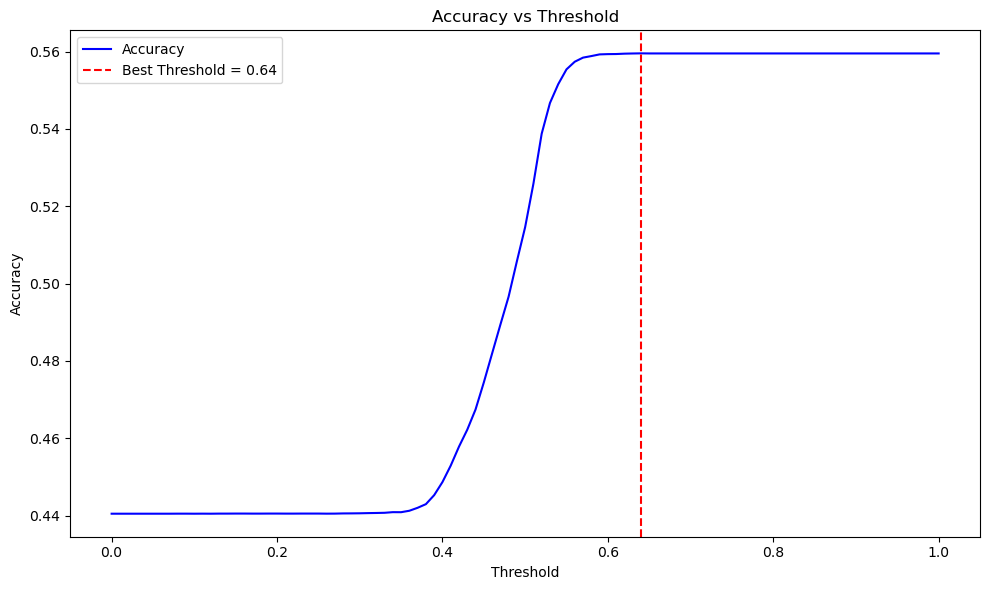

In [22]:
# Get predicted probabilities for class 1
y_pred_prob = RFmodel.predict_proba(X_test)[:, 1]

# Initialize tracking variables
best_threshold = 0
best_accuracy = 0
accuracy_per_threshold = []

# Evaluate thresholds from 0 to 1 (inclusive) with step 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

for threshold in thresholds:
    # Convert probabilities to binary predictions based on current threshold
    y_pred = (y_pred_prob >= threshold).astype(int)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_threshold.append((threshold, accuracy))
    
    # Update best threshold if current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Print the best threshold and accuracy
print(f"Best Threshold: {best_threshold:.2f}")
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")

# Plot accuracy vs. threshold
thresholds, accuracies = zip(*accuracy_per_threshold)
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')
plt.legend()
plt.tight_layout()
plt.show()


# Random Forest classifier with Recursive Feature Elimination

In [ ]:
# Base model
base_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=123
)

# Apply RFE to select top N features (e.g., 10)
rfe = RFE(estimator=base_model, n_features_to_select=10)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features by RFE:", selected_features.tolist())

# Re-train model with selected features
RFmodel = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=5,
    random_state=123
)
RFmodel.fit(X_train[selected_features], y_train)

# Predict on test set
y_pred = RFmodel.predict(X_test[selected_features])

# Evaluate the model
print("\nClassification Report for Random Forest Classifier on Test Data:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = RFmodel.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='Blues_r')
plt.title("Feature Importance from RF with RFE")
plt.tight_layout()
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
#sums to 200
cm = confusion_matrix(y_test, y_pred)

# Convert to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentages)')
plt.tight_layout()
plt.show()

In [ ]:
rf_rfe_results = {
    'model_name': 'Random Forest Classifier with RFE (Top 10 Features)',
    'model_object': RFmodel,
    'selected_features': selected_features.tolist(),
    'y_test': y_test.reset_index(drop=True),
    'y_pred': pd.Series(y_pred, name='RF_RFE_Pred'),
    'feature_importance': feature_importance_df
}

# Save the dictionary using joblib
joblib.dump(rf_rfe_results, 'RandomForest_RFE_Top10_Model_Results.pkl')

print("✅ RF with RFE model and results saved to 'RandomForest_RFE_Top10_Model_Results.pkl'")


# KNN (All features)

In [ ]:
#Nearet Neighbours on ALL features (could overfit)

# --- Use ALL features, not RFE selected ones ---
X_train_knn = X_train.dropna() 
y_train_knn = y_train.loc[X_train_knn.index]

X_test_knn = X_test.dropna()
y_test_knn = y_test.loc[X_test_knn.index]

# Find the best K
best_k = 0
best_accuracy = 0
accuracy_list = []

np.random.seed(100)

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation accuracy (5-fold CV)
    scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    accuracy_list.append(mean_score)
    
    if mean_score > best_accuracy:
        best_accuracy = mean_score
        best_k = k

print(f"Best k: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_knn, y_train_knn)

# Predict on test data
y_pred_knn = final_knn.predict(X_test_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Accuracy
test_accuracy = accuracy_score(y_test_knn, y_pred_knn)

print("\nConfusion Matrix on Test Set:")
print(cm_knn)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot Confusion Matrix (in %)
cm_percent = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(8,6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix (%) (All Features)')
plt.tight_layout()
plt.show()

# Plot Accuracy vs K
plt.figure(figsize=(10,6))
plt.plot(range(1, 16), accuracy_list, marker='o', color='blue')
plt.title('KNN Cross-Validation Accuracy vs Number of Neighbors (k) (All Features)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)

# Highlight best k
plt.scatter(best_k, best_accuracy, color='red', s=100, label=f"Best k = {best_k}")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# --- Visualize Most Relevant Features Based on Correlation ---
correlation_with_target = X_train_knn.corrwith(y_train_knn).abs().sort_values(ascending=False)

top_n = 10
top_features = correlation_with_target.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.xlabel('Absolute Correlation with Target')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Relevant Features (Correlation with Target)')
plt.tight_layout()
plt.show()


In [ ]:
top_features.to_csv("top_correlated_features.csv", header=True)

joblib.dump(correlation_with_target, "feature_target_correlation.pkl")

print("Feature importance (correlation-based) saved successfully.")


# KNN (Selected Features)

In [ ]:
# --- Use only selected features --- 
X_train_knn = X_train[selected_features].dropna()  
y_train_knn = y_train.loc[X_train_knn.index]

X_test_knn = X_test[selected_features].dropna()  
y_test_knn = y_test.loc[X_test_knn.index]

# Find the best K
best_k = 0
best_accuracy = 0
accuracy_list = []

# For reproducibility
np.random.seed(100)

for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross-validation accuracy (5-fold CV)
    scores = cross_val_score(knn, X_train_knn, y_train_knn, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    accuracy_list.append(mean_score)
    
    if mean_score > best_accuracy:
        best_accuracy = mean_score
        best_k = k

print(f"Best k: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_accuracy:.4f}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_knn, y_train_knn)

# Predict on test data
y_pred_knn = final_knn.predict(X_test_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)

# Accuracy
test_accuracy = accuracy_score(y_test_knn, y_pred_knn)

print("\nConfusion Matrix on Test Set:")
print(cm_knn)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Normalizing the confusion matrix to percentages, summing to 100%
cm_percent = cm_knn.astype('float') / cm_knn.sum() * 100  # Normalize to total sum = 100%

# Plot Confusion Matrix (in %)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix (%) (Selected Features)')
plt.tight_layout()
plt.show()

# Plot Accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracy_list, marker='o', color='blue')
plt.title('KNN Cross-Validation Accuracy vs Number of Neighbors (k) (Selected Features)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)

# Highlight best k
plt.scatter(best_k, best_accuracy, color='red', s=100, label=f"Best k = {best_k}")
plt.legend()
plt.tight_layout()
plt.show()

# --- Feature Importance Based on Correlation --- 
correlations = X_train_knn.corrwith(y_train_knn)

# Sort by absolute correlation value
top_features = correlations.abs().sort_values(ascending=False)

# Show top features
print("\nTop Features Based on Correlation with Target:")
print(top_features.head(10))  # Adjust this number based on how many top features you want

# Plot the top features based on correlation
plt.figure(figsize=(10,6))
top_features.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Features Based on Correlation with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()


In [1]:
#Saving
model_filename = 'final_knn_model.joblib'
joblib.dump(final_knn, model_filename)

print(f"Model saved to {model_filename}")


NameError: name 'joblib' is not defined